In [1]:
%matplotlib inline
from preamble import *

# Representing Data and Engineering Features

## Categorical Variables

### One-Hot-Encoding (Dummy variables)

In [18]:
import pandas as pd
# The file has no headers naming the columns, so we pass header=None and provide the column names explicitly in "names"
data = pd.read_csv("data/adult.csv", header=None, index_col=False, skiprows=1,
                   names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
                          'marital-status', 'occupation', 'relationship', 'race', 'gender',
                          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
# For illustration purposes, we only select some of the columns:
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
# print the first 5 rows
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,0,39,Bachelors,Male,40,Adm-clerical,<=50K
1,1,50,Bachelors,Male,13,Exec-managerial,<=50K
2,2,38,HS-grad,Male,40,Handlers-cleaners,<=50K
3,3,53,11th,Male,40,Handlers-cleaners,<=50K
4,4,28,Bachelors,Female,40,Prof-specialty,<=50K


#### Checking string-encoded categorical data

In [19]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [20]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'workclass', 'hours-per-week', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 

In [21]:
data_dummies.head()

,age,workclass,hours-per-week,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,0,39,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,50,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,38,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,53,40,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,28,40,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
# Get only the columns containing features, that is all columns from 'age' to 'occupation_ Transport-moving'
# This range contains all the features but not the target

features = data_dummies.ix[:, 'age':'occupation_ Transport-moving']
# extract numpy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print(X.shape, y.shape)

(32561, 36) (32561,)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.800515907137


### Numbers can encode categoricals

In [24]:
# create a dataframe with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
demo_df

,Categorical Feature,Integer Feature
0,socks,0
1,fox,1
2,socks,2
3,box,1


In [25]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [26]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df)

,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks,Integer Feature_0,Integer Feature_1,Integer Feature_2
0,0,0,1,1,0,0
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,1,0,0,0,1,0


## Binning, Discretization, Linear Models and Trees

/Users/tnarik/Desktop/odsc_workshops/python/.direnv/python-3.6.0/lib/python3.6/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


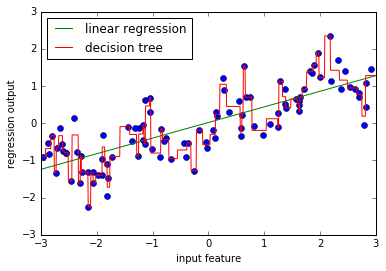

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
plt.plot(X[:, 0], y, 'o')
line = np.linspace(-3, 3, 1000)[:-1].reshape(-1, 1)

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")
plt.ylabel("regression output")
plt.xlabel("input feature")
plt.legend(loc="best")

In [28]:
np.set_printoptions(precision=2)
bins = np.linspace(-3, 3, 11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [29]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75]
 [ 2.7 ]
 [ 1.39]
 [ 0.59]
 [-2.06]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [30]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder.
encoder = OneHotEncoder(sparse=False)
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [31]:
X_binned.shape

(100, 10)

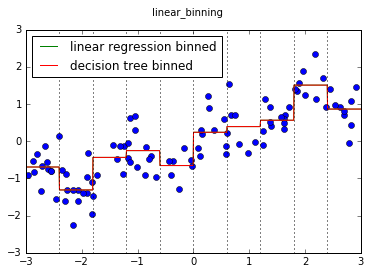

In [32]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

plt.plot(X[:, 0], y, 'o')
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")
plt.suptitle("linear_binning")

## Interactions and Polynomials

In [33]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


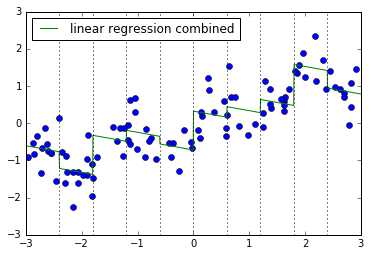

In [34]:
plt.plot(X[:, 0], y, 'o')

reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")

In [35]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


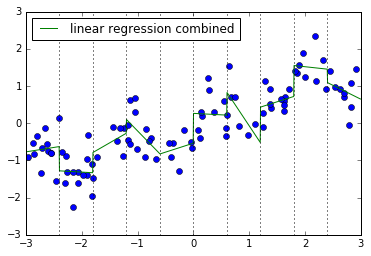

In [36]:
plt.plot(X[:, 0], y, 'o')
    
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")

In [37]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
poly = PolynomialFeatures(degree=10)
poly.fit(X)
X_poly = poly.transform(X)

In [38]:
X_poly.shape

(100, 11)

In [39]:
poly.get_feature_names()

['1',
 'x0',
 'x0^2',
 'x0^3',
 'x0^4',
 'x0^5',
 'x0^6',
 'x0^7',
 'x0^8',
 'x0^9',
 'x0^10']

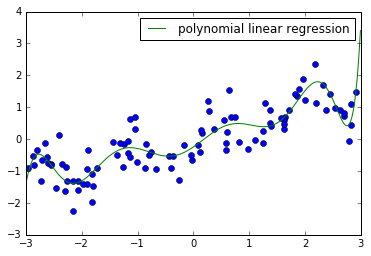

In [40]:
plt.plot(X[:, 0], y, 'o')
    
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.legend(loc="best")

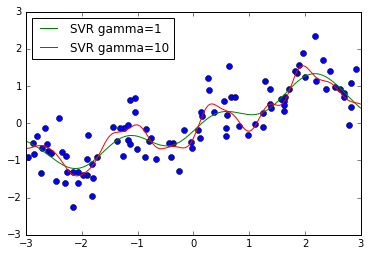

In [41]:
from sklearn.svm import SVR
plt.plot(X[:, 0], y, 'o')

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma=%d' % gamma)
    
plt.legend(loc="best")

In [42]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# rescale data:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(X_train.shape)
print(X_train_poly.shape)

(379, 13)
(379, 105)


In [44]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [45]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("score without interactions: %f" % ridge.score(X_test_scaled, y_test))
ridge = Ridge().fit(X_train_poly, y_train)
print("score with interactions: %f" % ridge.score(X_test_poly, y_test))

score without interactions: 0.621370
score with interactions: 0.753423


In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("score without interactions: %f" % rf.score(X_test_scaled, y_test))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("score with interactions: %f" % rf.score(X_test_poly, y_test))

score without interactions: 0.786464
score with interactions: 0.769691


In [47]:
rf.apply(X_test_poly)

array([[114, 156,  28, ...,  21,  30,  53],
       [ 87, 193, 269, ..., 258, 185, 199],
       [248, 256, 187, ...,  83, 248, 194],
       ..., 
       [246, 123, 244, ...,  65, 180, 202],
       [281, 281, 310, ..., 359, 306, 319],
       [272,  99, 127, ..., 230, 144, 262]])

In [48]:
rf.apply(X_test_poly).shape

(127, 100)

## Univariate Non-linear transformations

In [49]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = np.random.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [50]:
np.bincount(X[:, 0])

array([19, 47, 52, 60, 59, 53, 56, 45, 35, 45, 41, 36, 38, 30, 31, 26, 22,
       24, 14, 21, 12, 21, 10,  9,  6, 16, 11,  8,  8, 12, 11,  6,  3,  5,
        7,  4,  9,  2,  7,  1,  3,  5,  3,  3,  1,  3,  5,  3,  2,  0,  1,
        3,  3,  1,  1,  4,  2,  1,  1,  0,  3,  2,  1,  1,  1,  1,  0,  0,
        0,  0,  2,  1,  1,  1,  1,  0,  1,  0,  2,  1,  0,  0,  1,  0,  1,
        1,  0,  2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1])

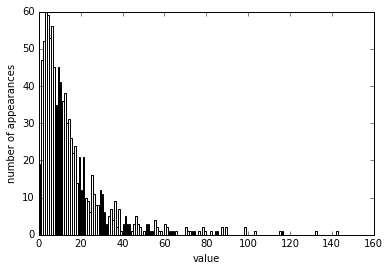

In [51]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='w')
plt.ylabel("number of appearances")
plt.xlabel("value")

In [52]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
Ridge().fit(X_train, y_train).score(X_test, y_test)

0.60537922175244463

In [53]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

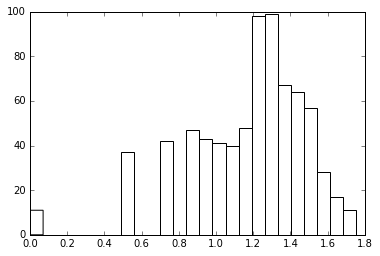

In [54]:
plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color='w');

In [55]:
Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)

0.86012845295724549

## Automatic Feature Selection
### Univariate statistics

In [56]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 10% of features:
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set:
X_train_selected = select.transform(X_train)

print(X_train.shape)
print(X_train_selected.shape)

(284, 80)
(284, 40)


In [57]:
from sklearn.feature_selection import f_classif, f_regression, chi2

In [58]:
F, p = f_classif(X_train, y_train)

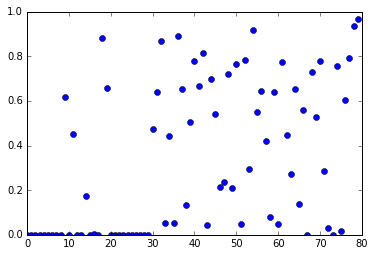

In [59]:
plt.figure()
plt.plot(p, 'o')

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


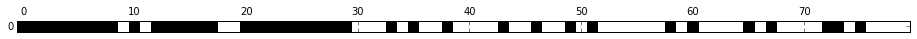

In [60]:
mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [61]:
from sklearn.linear_model import LogisticRegression

# transform test data:
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: %f" % lr.score(X_test, y_test))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: %f" % lr.score(X_test_selected, y_test))

Score with all features: 0.929825
Score with only selected features: 0.940351


### Model-based Feature Selection

In [62]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

In [63]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print(X_train.shape)
print(X_train_l1.shape)

(284, 80)
(284, 40)


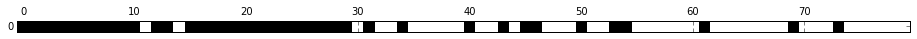

In [64]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [65]:
X_test_l1 = select.transform(X_test)
LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)

0.9508771929824561

### Recursive Feature Elimination

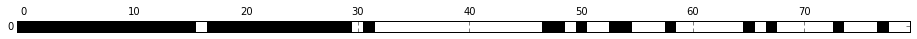

In [66]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
#select = RFE(LogisticRegression(penalty="l1"), n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [67]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

0.9508771929824561

In [68]:
select.score(X_test, y_test)

0.9508771929824561

### Sequential Feature Selection

In [69]:
from mlxtend.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(LogisticRegression(), k_features=40, 
                                 forward=True, scoring='accuracy',cv=5)
sfs = sfs.fit(X_train, y_train)

In [70]:
mask = np.zeros(80, dtype='bool')
mask[np.array(sfs.k_feature_idx_)] = True

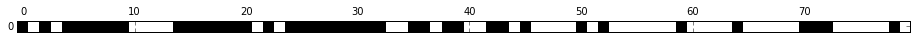

In [71]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [73]:
LogisticRegression().fit(sfs.transform(X_train), y_train).score(sfs.transform(X_test), y_test)

0.93684210526315792

# Exercises
Choose either the Boston housing dataset or the adult dataset from above. Compare a linear model with interaction features against one without interaction features.
Use feature selection to determine which interaction features were most important.

In [79]:
data = pd.read_csv("data/adult.csv", header=None, index_col=False, skiprows=1,
                   names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
                          'marital-status', 'occupation', 'relationship', 'race', 'gender',
                          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
y = data.income.values
X = pd.get_dummies(data.drop("income", axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_ = scaler.transform(X_train)
X_test_ = scaler.transform(X_test)

In [80]:
LogisticRegression().fit(X_train_, y_train).score(X_test_, y_test)

0.84842156983171602

In [81]:
X_train.shape

(24420, 108)

In [82]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold="5 * median")
X_train_selected = select.fit_transform(X_train_, y_train)
X_test_selected = select.transform(X_test_)

In [83]:
LogisticRegression().fit(X_train_selected, y_train).score(X_test_selected, y_test)

0.84387667362731855

In [84]:
X_train_selected.shape

(24420, 21)

In [85]:
poly = PolynomialFeatures(degree=2).fit(X_train_selected)
X_train_selected_poly = poly.transform(X_train_selected)
X_test_selected_poly = poly.transform(X_test_selected)


In [86]:
lr = LogisticRegression(C=0.01, penalty="l1").fit(X_train_selected_poly, y_train)
lr.score(X_test_selected_poly, y_test)

0.82090652254022844

In [87]:
np.array(poly.get_feature_names(X.columns[select.get_support()]))[lr.coef_.ravel() != 0]

array(['1', 'capital-gain', 'education_ HS-grad',
       'marital-status_ Never-married', 'occupation_ Exec-managerial',
       'occupation_ Prof-specialty', 'gender_ Female',
       'workclass gender_ Male', 'education-num^2',
       'education-num marital-status_ Married-civ-spouse',
       'hours-per-week marital-status_ Married-civ-spouse',
       'fnlwgt_ Private education_ Bachelors',
       'fnlwgt_ Private marital-status_ Never-married',
       'marital-status_ Never-married^2', 'occupation_ Exec-managerial^2',
       'occupation_ Prof-specialty^2', 'occupation_ Sales gender_ Male',
       'relationship_ Wife gender_ Female', 'gender_ Female^2'], 
      dtype='<U64')

### Now let's try to do it ourselves

In [88]:
data = pd.read_csv("data/adult.csv", header=0, index_col=False,
                   names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
                          'marital-status', 'occupation', 'relationship', 'race', 'gender',
                          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

In [89]:
y = data.income.values
X = pd.get_dummies(data.drop("income", axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [90]:
print(np.shape(X_train))
print(np.shape(X_test))

lr = LogisticRegression().fit(X_train, y_train)
print(lr.score(X_test, y_test))

lr.coef_

(24420, 108)
(8141, 108)
0.847561724604


array([[ -7.62e-06,   2.09e-03,   7.24e-02,   3.10e-04,   6.22e-04,
          1.11e-02,  -3.82e-01,   1.78e-01,  -1.75e-01,  -1.80e-03,
         -2.94e-01,   1.63e-01,  -4.61e-01,  -2.39e-01,  -8.07e-03,
         -2.75e-01,  -3.49e-01,  -9.92e-02,  -7.33e-02,  -1.37e-01,
         -2.75e-01,  -1.96e-01,  -6.14e-02,  -1.04e-01,   2.92e-01,
          2.20e-01,  -5.44e-01,   4.41e-01,  -2.40e-02,   2.52e-01,
         -2.87e-01,  -3.55e-01,   1.41e-02,   7.32e-01,  -8.15e-02,
         -1.24e+00,  -1.77e-01,  -1.14e-01,  -3.84e-01,  -2.07e-01,
         -4.30e-03,  -2.01e-01,   7.18e-01,  -3.62e-01,  -3.64e-01,
         -3.61e-01,  -6.73e-01,  -3.18e-02,   4.78e-01,   4.82e-02,
          1.46e-01,   1.62e-01,  -1.84e-01,   2.79e-01,  -4.13e-01,
         -2.35e-01,  -8.75e-01,  -5.17e-01,   5.41e-01,  -1.21e-01,
         -1.89e-01,  -4.34e-01,  -1.09e-01,  -3.68e-01,  -8.07e-01,
         -4.14e-01,  -1.47e-01,   2.21e-03,  -5.14e-04,  -4.35e-02,
         -3.42e-02,  -1.00e-02,  -2.85e-02,  -1.

In [91]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2).fit(X_train)
X_train_ = poly.transform(X_train)
X_test_ = poly.transform(X_test)

np.shape(X_train_)

(24420, 5995)

In [92]:
plr = LogisticRegression().fit(X_train_, y_train)
plr.score(X_test_, y_test)

0.8226262129959464

In [93]:
plr.coef_

array([[ -6.29e-09,  -2.98e-05,  -1.67e-07, ...,  -3.48e-11,   0.00e+00,
         -1.11e-12]])